In [873]:
# Visualization modules
import matplotlib.pyplot as plt
# Import data preprocessing modules
import pandas as pd
import seaborn as sns
from keras.layers.core import Dense, Activation
# Install Keras and Sklearn
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [874]:
%matplotlib inline
# Set seaborn as the default drawing library
sns.set()

# Train Data

In [875]:
# Read the file
train_set = pd.read_csv('input/titanic.csv', encoding='utf8')

In [876]:
# Name
train_set['Title'] = train_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


def title_mapping(title: str):
	titles = {'Mr': 0, 'Miss': 1, 'Mrs': 2}
	if title in titles.keys():
		return titles[title]
	return 3


train_set['Title'] = train_set['Title'].map(title_mapping)
train_set['Title'] = train_set['Title'].astype(int)
train_set.drop('Name', axis=1, inplace=True)

In [877]:
# Sex
sex_mapping = {'male': 0, 'female': 1}
train_set['Sex'] = train_set['Sex'].map(sex_mapping)
train_set['Sex'] = train_set['Sex'].astype(int)

In [878]:
# Age
train_set['Age'].fillna(train_set.groupby('Title')['Age'].transform('median'), inplace=True)
train_set.loc[train_set['Age'] <= 16, 'Age'] = 0
train_set.loc[(train_set['Age'] > 16) & (train_set['Age'] <= 26), 'Age'] = 1
train_set.loc[(train_set['Age'] > 26) & (train_set['Age'] <= 36), 'Age'] = 2
train_set.loc[(train_set['Age'] > 36) & (train_set['Age'] <= 62), 'Age'] = 3
train_set.loc[train_set['Age'] > 62, 'Age'] = 4
train_set['Age'] = train_set['Age'].astype(int)

In [879]:
# Embarked
train_set['Embarked'] = train_set['Embarked'].fillna('S')
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train_set['Embarked'] = train_set['Embarked'].map(embarked_mapping)
train_set['Embarked'] = train_set['Embarked'].astype(int)

In [880]:
# Fare
train_set['Fare'].fillna(train_set.groupby('Pclass')['Fare'].transform('median'), inplace=True)
train_set.loc[train_set['Fare'] <= 17, 'Fare'] = 0
train_set.loc[(train_set['Fare'] > 17) & (train_set['Fare'] <= 30), 'Fare'] = 1
train_set.loc[(train_set['Fare'] > 30) & (train_set['Fare'] <= 100), 'Fare'] = 2
train_set.loc[train_set['Fare'] > 100, 'Fare'] = 3
train_set['Fare'] = train_set['Fare'].astype(int)

In [881]:
# Cabin
train_set['Cabin'] = train_set['Cabin'].str[:1]
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
train_set['Cabin'] = train_set['Cabin'].map(cabin_mapping)
train_set['Cabin'].fillna(train_set.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
train_set['Cabin'] = train_set['Cabin'].astype(float)

In [882]:
# Sibsp & Parch
train_set['FamilySize'] = train_set['SibSp'] + train_set['Parch'] + 1
family_mapping: dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train_set['FamilySize'] = train_set['FamilySize'].map(family_mapping)
train_set['FamilySize'] = train_set['FamilySize'].astype(float)

In [883]:
# Delete Sibsp, Parch, Ticket
feature_drop = ['Ticket', 'SibSp', 'Parch']
train_set = train_set.drop(feature_drop, axis=1)

In [884]:
# Set Target Variables and Explanatory Variables
train_set_data = train_set.drop('Survived', axis=1)
train_set_label = train_set[['Survived']]

In [885]:
# Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_set_data = minmax_scale.fit_transform(train_set_data)

# Test Data

In [886]:
test_set = pd.read_csv('input/test.csv', encoding='utf8')

In [887]:
# Name
test_set['Title'] = test_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


def title_mapping(title: str):
	titles = {'Mr': 0, 'Miss': 1, 'Mrs': 2}
	if title in titles.keys():
		return titles[title]
	return 3


test_set['Title'] = test_set['Title'].map(title_mapping)
train_set['Title'] = train_set['Title'].astype(int)
test_set.drop('Name', axis=1, inplace=True)

In [888]:
# Sex
sex_mapping = {'male': 0, 'female': 1}
test_set['Sex'] = test_set['Sex'].map(sex_mapping)
test_set['Sex'] = test_set['Sex'].astype(int)

In [889]:
# Age
test_set['Age'].fillna(test_set.groupby('Title')['Age'].transform('median'), inplace=True)
test_set.loc[test_set['Age'] <= 16, 'Age'] = 0
test_set.loc[(test_set['Age'] > 16) & (test_set['Age'] <= 26), 'Age'] = 1
test_set.loc[(test_set['Age'] > 26) & (test_set['Age'] <= 36), 'Age'] = 2
test_set.loc[(test_set['Age'] > 36) & (test_set['Age'] <= 62), 'Age'] = 3
test_set.loc[test_set['Age'] > 62, 'Age'] = 4
test_set['Age'] = test_set['Age'].astype(int)

In [890]:
# Embarked (登船地點)
test_set['Embarked'] = test_set['Embarked'].fillna('S')
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
test_set['Embarked'] = test_set['Embarked'].map(embarked_mapping)
test_set['Embarked'] = test_set['Embarked'].astype(int)

In [891]:
# Fare(票價)
test_set['Fare'].fillna(test_set.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_set.loc[test_set['Fare'] <= 17, 'Fare'] = 0
test_set.loc[(test_set['Fare'] > 17) & (test_set['Fare'] <= 30), 'Fare'] = 1
test_set.loc[(test_set['Fare'] > 30) & (test_set['Fare'] <= 100), 'Fare'] = 2
test_set.loc[test_set['Fare'] > 100, 'Fare'] = 3
test_set['Fare'] = test_set['Fare'].astype(int)

In [892]:
# Cabin
test_set['Cabin'] = test_set['Cabin'].str[:1]
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
test_set['Cabin'] = test_set['Cabin'].map(cabin_mapping)
test_set['Cabin'].fillna(test_set.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test_set['Cabin'] = test_set['Cabin'].astype(float)

In [893]:
# FamilySize
test_set['FamilySize'] = test_set['SibSp'] + test_set['Parch'] + 1
family_mapping: dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
test_set['FamilySize'] = test_set['FamilySize'].map(family_mapping)
test_set['FamilySize'] = test_set['FamilySize'].astype(float)

In [894]:
# Data Cleaning (資料清洗)
feature_drop = ['Ticket', 'SibSp', 'Parch']
test_set = test_set.drop(feature_drop, axis=1)

In [895]:
# Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
test_set = minmax_scale.fit_transform(test_set)

# Model

# Build the model-DNN

In [896]:
# Create Model Function
def DNN():
	model = Sequential()
	model.add(Dense(input_dim=9, units=40))
	model.add(Activation('relu'))
	model.add(Dense(units=100))
	model.add(Activation('relu'))
	model.add(Dense(units=10))
	model.add(Activation('relu'))
	model.add(Dense(units=1))
	model.add(Activation('sigmoid'))
	model.summary()

	return model

In [897]:
# Create a Drawing Function
def show_train_history(train_history, train, validation, label):
	plt.plot(train_history.history[train])
	plt.plot(train_history.history[validation])
	plt.title('Train History')
	plt.ylabel(label)
	plt.xlabel('Epoch')
	plt.legend(['train', 'validation'], loc='upper left')
	plt.show()

In [898]:
model = DNN()
# Train Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
train_history = model.fit(train_set_data, train_set_label, validation_split=0.2, batch_size=30, epochs=20)
# Evaluate training result
score = model.evaluate(x=train_set_data, y=train_set_label)
print('\nTrain Loss:', score[0])
print('\nTrain Acc:', score[1])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 40)                400       
                                                                 
 activation_96 (Activation)  (None, 40)                0         
                                                                 
 dense_97 (Dense)            (None, 100)               4100      
                                                                 
 activation_97 (Activation)  (None, 100)               0         
                                                                 
 dense_98 (Dense)            (None, 10)                1010      
                                                                 
 activation_98 (Activation)  (None, 10)                0         
                                                                 
 dense_99 (Dense)            (None, 1)               

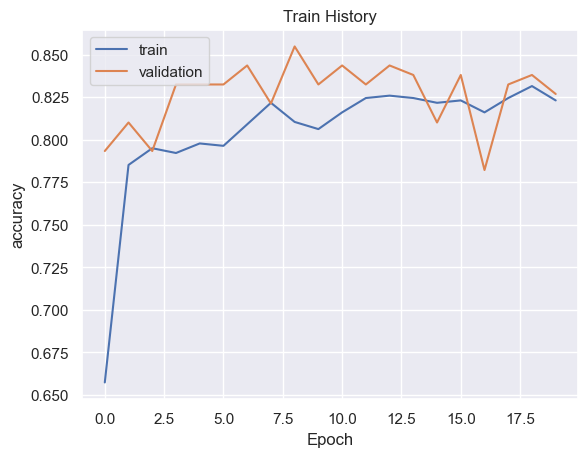

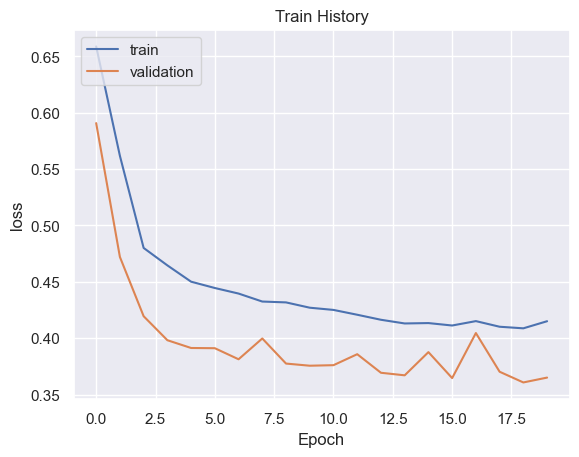

In [899]:
#Show Training Process
show_train_history(train_history, 'acc', 'val_acc', 'accuracy')
show_train_history(train_history, 'loss', 'val_loss', 'loss')

In [900]:
W, b = model.layers[0].get_weights()
print('weights = {}, \n\nbiases = {}'.format(W, b))

weights = [[ 2.16649950e-01 -2.19843864e-01  1.56829730e-01  3.58759820e-01
   1.93818882e-01  2.13612482e-01  4.63877976e-01  2.60051209e-02
   2.98845500e-01  9.72504020e-02  9.99069512e-02  1.03277683e-01
   9.80858132e-02  5.22173755e-02 -1.62386671e-01  8.76262598e-03
  -1.88905984e-01 -1.01324461e-01  4.44196671e-01 -2.21303897e-03
  -2.93439955e-01  5.65755926e-02  3.34419161e-01  3.66070382e-02
  -2.36587021e-02 -2.22538769e-01  2.66337186e-01 -6.60712942e-02
   1.90506399e-01  2.17358023e-01  1.10380687e-01 -3.51059526e-01
   3.39783043e-01 -2.47742563e-01  4.20830101e-01 -2.89889336e-01
  -7.75633529e-02 -1.38161466e-01  2.39424661e-01 -8.05388018e-03]
 [ 1.01611400e-02  7.81771839e-02  8.65108818e-02  1.32943615e-01
   2.68319249e-01 -2.04737447e-02  8.54952037e-02 -4.94305901e-02
   2.94711858e-01  2.49011874e-01 -2.62919337e-01  6.03979863e-02
   3.04940104e-01  2.06457764e-01 -2.69372612e-01 -3.33134413e-01
   1.95953250e-01 -2.15158999e-01 -2.47235134e-01 -1.07797347e-02

In [901]:
predictions = model.predict(test_set)
predictions = predictions.flatten()
testdata_write = pd.read_csv('input/test.csv', encoding='utf8')
submission = pd.DataFrame({
	'PassengerId': testdata_write['PassengerId'],
	'Survived': predictions
})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('result/submission.csv', index=False, encoding='utf8')

14/14 [==============================] - 0s 2ms/step


In [902]:
!kaggle competitions submit -f 'result/submission.csv' -m 'DNN model' titanic

100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 815B/s]
400 - Bad Request


# SVM

In [903]:
model = SVC()
model.fit(train_set_data, train_set['Survived'])

SVC()

In [904]:
predictions = model.predict(test_set)
predictions = predictions.flatten()
testdata_write = pd.read_csv('input/test.csv', encoding='utf8')
submission = pd.DataFrame({
	'PassengerId': testdata_write['PassengerId'],
	'Survived': predictions
})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('result/submission.csv', index=False, encoding='utf8')

In [905]:
!kaggle competitions submit -f 'result/submission.csv' -m 'SVM model' titanic

100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 881B/s]
400 - Bad Request


# Random Forest

In [906]:
model = RandomForestClassifier(n_estimators=700)
model.fit(train_set_data, train_set['Survived'])

RandomForestClassifier(n_estimators=700)

In [907]:
predictions = model.predict(test_set)
predictions = predictions.flatten()
testdata_write = pd.read_csv('input/test.csv', encoding='utf8')
submission = pd.DataFrame({
	'PassengerId': testdata_write['PassengerId'],
	'Survived': predictions
})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('result/submission.csv', index=False, encoding='utf8')

In [908]:
!kaggle competitions submit -f 'result/submission.csv' -m 'Random Forest model' titanic


100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 833B/s]
400 - Bad Request
